In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


Using TensorFlow backend.


In [41]:
training = pd.read_csv("../input/Stroke/train_2v.csv")
testing = pd.read_csv("../input/Stroke/test_2v.csv")

In [34]:
training.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [35]:
testing.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [5]:
training.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [6]:
testing.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi
count,18601.000000,18601.000000,18601.000000,18601.000000,18601.000000,18010.000000
mean,36747.368045,42.056504,0.093167,0.048062,104.386359,28.545325
std,21053.151124,22.528018,0.290674,0.213903,42.606714,7.757092
min,2.000000,0.080000,0.000000,0.000000,55.000000,10.200000
25%,18542.000000,24.000000,0.000000,0.000000,77.550000,23.300000
50%,36717.000000,43.000000,0.000000,0.000000,91.830000,27.700000
75%,55114.000000,60.000000,0.000000,0.000000,112.310000,32.800000
max,72942.000000,82.000000,1.000000,1.000000,275.720000,88.300000


In [7]:
def null_table(training, testing):
    print("Training Data Frame")
    print(pd.isnull(training).sum())
    print(" ")
    print("Testing Data Frame")
    print(pd.isnull(testing).sum())

In [8]:
null_table(training, testing)

Training Data Frame
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64
 
Testing Data Frame
id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64


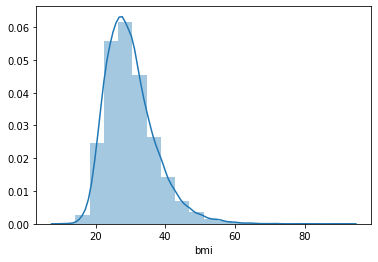

In [9]:
copy = training.copy()
copy.dropna(inplace = True)
sns.distplot(copy["bmi"], bins=20)

In [15]:
training["gender"].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [16]:
training["ever_married"].unique()

array(['No', 'Yes'], dtype=object)

In [17]:
training["work_type"].unique()

array(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],
      dtype=object)

In [19]:
training["Residence_type"].unique()

array(['Rural', 'Urban'], dtype=object)

In [21]:
training["smoking_status"].unique()

array([nan, 'never smoked', 'formerly smoked', 'smokes'], dtype=object)

In [249]:
training = pd.read_csv("../input/Stroke/train_2v.csv")
training["gender"].replace(['Male', 'Female', 'Other'], [0, 2, 1], inplace=True)
training["ever_married"].replace(['No', 'Yes'], [0, 1], inplace=True)
training["work_type"].replace(['children', 'Private', 'Never_worked', 'Self-employed', 'Govt_job'],[0,1,2,3,4], inplace=True)
training["Residence_type"].replace(['Rural', 'Urban'], [0, 1], inplace=True)
training["smoking_status"].fillna("never smoked", inplace=True)
training["smoking_status"].replace(['never smoked', 'formerly smoked', 'smokes'], [0,1,2], inplace=True)
training["bmi"].fillna(training["bmi"].median(), inplace= True)

testing = training.iloc[-8401:-1]
testing2 = training.loc[training['stroke'] == 1]

# Comment below lines if you want to keep the original size of data.
#testing1 = training.loc[training['stroke'] == 0]
#testing1 = testing1[0:1000]
#training = pd.concat([testing1,testing2])
#training = training.sample(frac=1)
#testing = training.iloc[-284:-1]
#training = training.iloc[0:1500]


In [250]:
training.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,0,3.0,0,0,0,0,0,95.12,18.0,0,0
1,30468,0,58.0,1,0,1,1,1,87.96,39.2,0,0
2,16523,2,8.0,0,0,0,1,1,110.89,17.6,0,0
3,56543,2,70.0,0,0,1,1,0,69.04,35.9,1,0
4,46136,0,14.0,0,0,0,2,0,161.28,19.1,0,0


In [251]:
training.iloc[:,3:12].describe()

,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,0.093571,0.047512,0.643733,1.551313,0.501290,104.482750,28.574551,0.475046,0.018041
std,0.291235,0.212733,0.478901,1.263410,0.500004,43.111751,7.639769,0.742823,0.133103
min,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.100000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,77.540000,23.400000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,91.580000,27.700000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,3.000000,1.000000,112.070000,32.600000,1.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,97.600000,2.000000,1.000000


In [252]:
testing.iloc[:,3:12].describe()

,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000
mean,0.087976,0.048571,0.640238,1.536071,0.500476,104.146399,28.449798,0.474881,0.019167
std,0.283277,0.214983,0.479959,1.260133,0.500030,42.874522,7.591391,0.741881,0.137119
min,0.000000,0.000000,0.000000,0.000000,0.000000,55.010000,12.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,77.470000,23.400000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,1.000000,1.000000,91.435000,27.700000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,3.000000,1.000000,111.847500,32.400000,1.000000,0.000000
max,1.000000,1.000000,1.000000,4.000000,1.000000,291.050000,89.000000,2.000000,1.000000


In [253]:
testing2.iloc[:,3:12].describe()

,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.0
mean,0.255428,0.226054,0.897829,1.979566,0.509579,129.582669,29.480460,0.621967,1.0
std,0.436380,0.418542,0.303067,1.161880,0.500228,59.734073,5.808726,0.758669,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,55.010000,14.300000,0.000000,1.0
25%,0.000000,0.000000,1.000000,1.000000,0.000000,80.990000,26.400000,0.000000,1.0
50%,0.000000,0.000000,1.000000,1.000000,1.000000,104.470000,27.700000,0.000000,1.0
75%,1.000000,0.000000,1.000000,3.000000,1.000000,192.360000,31.900000,1.000000,1.0
max,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,56.600000,2.000000,1.0


In [256]:
x = training.values[:,1:11]
y = training.values[:,11]
x1 = testing.values[:,1:11]
expect_y1 = testing.values[:,11]
x2 = testing2.values[:,1:11]
expect_y2 = testing2.values[:,11]

In [257]:
model = Sequential()
model.add(Dense(15, input_dim=10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [258]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [259]:
model.fit(x, y, epochs=20, batch_size=100, verbose=1)
_, accuracy = model.evaluate(x, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
43400/43400 [==============================] - 1s 25us/step - loss: 0.1172 - accuracy: 0.9771
Epoch 2/20
43400/43400 [==============================] - 1s 21us/step - loss: 0.0874 - accuracy: 0.9820
Epoch 3/20
43400/43400 [==============================] - 1s 19us/step - loss: 0.0844 - accuracy: 0.9820
Epoch 4/20
43400/43400 [==============================] - 1s 20us/step - loss: 0.0832 - accuracy: 0.9820
Epoch 5/20
43400/43400 [==============================] - 1s 23us/step - loss: 0.0823 - accuracy: 0.9820
Epoch 6/20
43400/43400 [==============================] - 1s 21us/step - loss: 0.0822 - accuracy: 0.9820
Epoch 7/20
43400/43400 [==============================] - 1s 19us/step - loss: 0.0811 - accuracy: 0.9820
Epoch 8/20
43400/43400 [==============================] - 1s 19us/step - loss: 0.0808 - accuracy: 0.9820
Epoch 9/20
43400/43400 [==============================] - 1s 18us/step - loss: 0.0803 - accuracy: 0.9820
Epoch 10/20
43400/43400 [==============================

In [260]:
y1 = model.predict(x1)
y2 = model.predict(x2)

In [261]:
for i in range(10):
	print('%s => %f (expected %d)' % (x[i].tolist(), round(y1[i,0]), expect_y1[i]))

[0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 95.12, 18.0, 0.0] => 0.000000 (expected 0)
[0.0, 58.0, 1.0, 0.0, 1.0, 1.0, 1.0, 87.96, 39.2, 0.0] => 0.000000 (expected 0)
[2.0, 8.0, 0.0, 0.0, 0.0, 1.0, 1.0, 110.89, 17.6, 0.0] => 0.000000 (expected 0)
[2.0, 70.0, 0.0, 0.0, 1.0, 1.0, 0.0, 69.04, 35.9, 1.0] => 0.000000 (expected 0)
[0.0, 14.0, 0.0, 0.0, 0.0, 2.0, 0.0, 161.28, 19.1, 0.0] => 0.000000 (expected 0)
[2.0, 47.0, 0.0, 0.0, 1.0, 1.0, 1.0, 210.95, 50.1, 0.0] => 0.000000 (expected 0)
[2.0, 52.0, 0.0, 0.0, 1.0, 1.0, 1.0, 77.59, 17.7, 1.0] => 0.000000 (expected 0)
[2.0, 75.0, 0.0, 1.0, 1.0, 3.0, 0.0, 243.53, 27.0, 0.0] => 0.000000 (expected 0)
[2.0, 32.0, 0.0, 0.0, 1.0, 1.0, 0.0, 77.67, 32.3, 2.0] => 0.000000 (expected 0)
[2.0, 74.0, 1.0, 0.0, 1.0, 3.0, 1.0, 205.84, 54.6, 0.0] => 0.000000 (expected 0)


In [262]:
round_y1 =  expect_y1.copy(); 
for i in range(len(y1)):
    round_y1[i] = round(y1[i,0])

In [263]:
z = sum(abs(round_y1[:] -  expect_y1[:]))
(len(expect_y1) - z)*100/len(expect_y1)

98.08333333333333

In [264]:
round_y2 =  expect_y2.copy(); 
for i in range(len(y2)):
    round_y2[i] = round(y2[i,0])

In [265]:
z = sum(abs(round_y2[:] -  expect_y2[:]))
(len(expect_y2) - z)*100/len(expect_y2)

0.0